In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q5

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [3]:
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW1/Q5_image/img_improvment.png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(output_image)

(-0.5, 383.5, 287.5, -0.5)

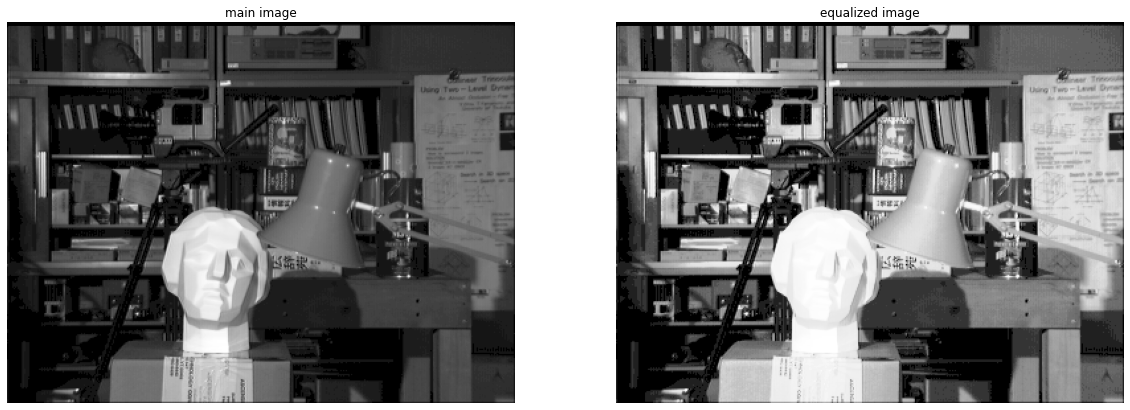

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [ ]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()

  #######################
  #    your code here   #
  #######################
  # calculate number of grids in x and y direction
  vertical_num_grids = x // gridSize
  horizontal_num_grids = y // gridSize
  
  # loop over each grid and apply histogram equalization using OpenCV's equalizeHist function
  for i in range(vertical_num_grids):
    for j in range(horizontal_num_grids):
      start_x = i * gridSize
      end_x = (i + 1) * gridSize
      start_y = j * gridSize
      end_y = (j + 1) * gridSize
      grid = output_image[start_x:end_x, start_y:end_y]
      equalized_grid = cv2.equalizeHist(grid)
      output_image[start_x:end_x, start_y:end_y] = equalized_grid
  
  return output_image

(-0.5, 383.5, 287.5, -0.5)

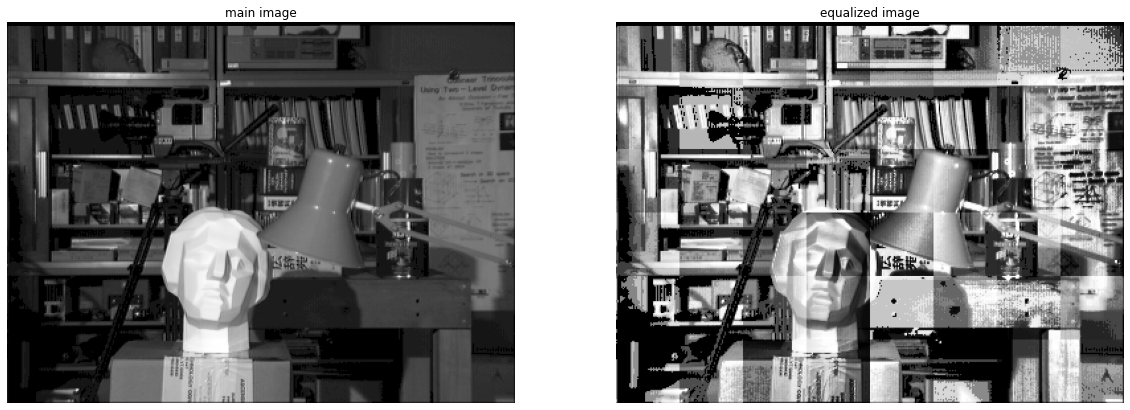

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [ ]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    
    #######################
    #    your code here   #
    #######################
    # Pad the image with reflect mode to avoid edge effects
    padding_size = (gridSize[0]//2, gridSize[1]//2)
    # copyMakeBorder( src, dst, top, bottom, left, right, borderType, value )
    # value: If borderType is BORDER_CONSTANT, this is the value used to fill the border pixels.
    padded_img = cv2.copyMakeBorder(image, padding_size[0], padding_size[0], padding_size[1], padding_size[1], cv2.BORDER_REPLICATE)

    # Loop over the image with a sliding grid of size gridSize
    for i in range(padding_size[0], padded_img.shape[0]-padding_size[0]):
        for j in range(padding_size[1], padded_img.shape[1]-padding_size[1]):
            # Define the grid
            grid = padded_img[i-padding_size[0]:i+padding_size[0], j-padding_size[1]:j+padding_size[1]]
            # Apply histogram equalization to the grid using OpenCV's equalizeHist function
            equalized_grid = cv2.equalizeHist(grid)
            # Replace the center pixel in the output with the corresponding pixel from the equalized grid
            output[i-padding_size[0], j-padding_size[1]] = equalized_grid[padding_size[0]-1, padding_size[1]-1]
    
    return output

(-0.5, 383.5, 287.5, -0.5)

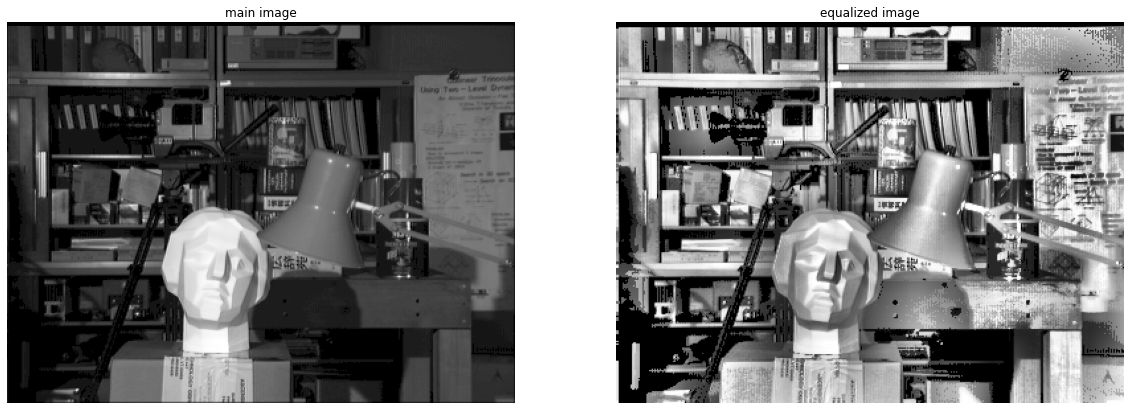

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [25]:
def histogram_equalization(image, clip_limit, gridSize):
    MIN = 0
    MAX = 255
    # Calculate histogram of input image
    grid_hist = cv2.calcHist([image], [0], None, [256], [0,256])
    clip_hist = np.clip(grid_hist, 0, clip_limit)
    clipped_cnt = grid_hist - clip_hist
    clipped_per_pixel = clipped_cnt / 256
    clip_hist += clipped_per_pixel
    # Calculate (CDF)
    cdf = np.cumsum(clip_hist)
    cdf_normalized = MAX*(cdf / float((image.shape[0] * image.shape[1])))
    # Map image intensities to new values using CDF
    return cdf_normalized[image]


def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    #######################
    #    your code here   #
    #######################
    # Pad the image with reflect mode to avoid edge effects
    padding_size = (gridSize[0]//2, gridSize[1]//2)
    padded_img = cv2.copyMakeBorder(image, *padding_size, *padding_size, cv2.BORDER_REPLICATE)

    # Loop over the image with a sliding grid of size gridSize
    for i in range(padding_size[0], padded_img.shape[0]-padding_size[0]):
        for j in range(padding_size[1], padded_img.shape[1]-padding_size[1]):
            # Define the grid
            grid = padded_img[i-padding_size[0]:i+padding_size[0], j-padding_size[1]:j+padding_size[1]]
            equalized_grid = histogram_equalization(grid, clip_limit, gridSize)
            # Assign equalized grid to output image
            output[i-padding_size[0],j-padding_size[1]] = equalized_grid[padding_size[0], padding_size[1]]

    
    return output


(-0.5, 383.5, 287.5, -0.5)

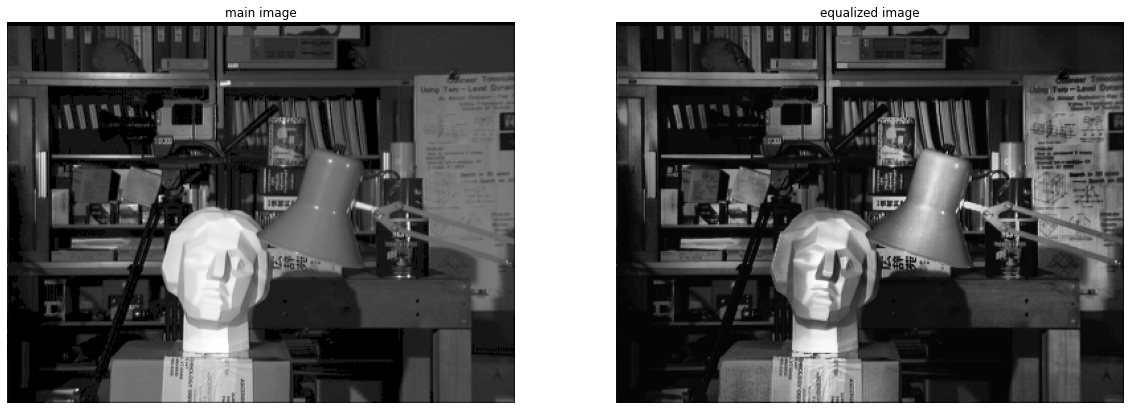

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')